# Using Naïve Bayes for Predictions

## Predicting text classifications

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(
            subset='train', remove=('headers', 'footers',   
                                    'quotes'))
newsgroups_test = fetch_20newsgroups(
             subset='test', remove=('headers', 'footers', 
                                    'quotes'))

In [2]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
Bernoulli = BernoulliNB(alpha=0.01)
Multinomial = MultinomialNB(alpha=0.01)

In [3]:
import sklearn.feature_extraction.text as txt
multinomial = txt.HashingVectorizer(stop_words='english', 
                                binary=False, norm=None)
binary = txt.HashingVectorizer(stop_words='english',
                           binary=True, norm=None)

In [4]:
import numpy as np
target = newsgroups_train.target
target_test = newsgroups_test.target
multi_X = np.abs(
    multinomial.transform(newsgroups_train.data))
multi_Xt = np.abs(
    multinomial.transform(newsgroups_test.data))
bin_X = binary.transform(newsgroups_train.data)
bin_Xt = binary.transform(newsgroups_test.data)

Multinomial.fit(multi_X, target)
Bernoulli.fit(bin_X, target)

from sklearn.metrics import accuracy_score
for name, model, data in [('BernoulliNB', Bernoulli, 
                           bin_Xt), 
                      ('MultinomialNB', Multinomial, 
                       multi_Xt)]:
    accuracy = accuracy_score(y_true=target_test, 
                              y_pred=model.predict(data))
    print ('Accuracy for %s: %.3f' % (name, accuracy))

Accuracy for BernoulliNB: 0.570
Accuracy for MultinomialNB: 0.651


In [5]:
print('number of posts in training: %i' 
      % len(newsgroups_train.data))
D={word:True for post in newsgroups_train.data 
   for word in post.split(' ')}
print('number of distinct words in training: %i' 
      % len(D))
print('number of posts in test: %i' 
      % len(newsgroups_test.data))

number of posts in training: 11314
number of distinct words in training: 300972
number of posts in test: 7532


## Getting an overview of Bayesian inference

### Developing a simple inference example

In [6]:
import numpy as np

colors = ['Red', 'Black', 'Tan']
c = np.array([3, 2, 1])
alphas = np.array([4, 1, 3])

expected_p = (alphas + c) / (c.sum() + alphas.sum())

new_values = dict(zip(colors, expected_p))
for x in new_values:
    print("{}:\t{:2.2%}".format(x, new_values[x]))

Red:	50.00%
Black:	21.43%
Tan:	28.57%


In [7]:
import pymc3 as pm

with pm.Model() as model:
    parameters = pm.Dirichlet('parameters', a=alphas, 
                              shape=3)
    observed_data = pm.Multinomial(
        'observed_data', n=6, p=parameters, shape=3, 
        observed=c)

C:\Users\John\Anaconda3\envs\PYMC3_env\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\John\Anaconda3\envs\PYMC3_env\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [8]:
with model:
    trace = pm.sample(draws=1000, chains=2, tune=500, 
                      discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:11<00:00, 253.26draws/s] 


Text(0.5, 1.0, 'Tan Trace Samples')

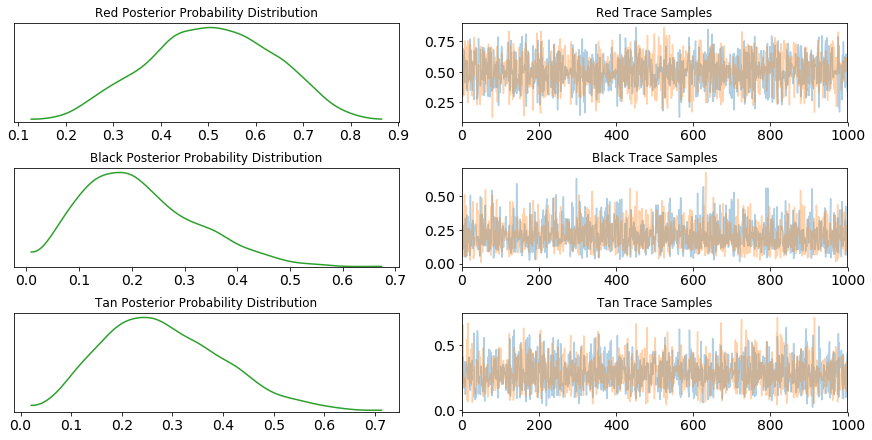

In [9]:
dataPlot1 = pm.plots.traceplot(trace, combined=True)
dataPlot1[0][0].set_title(
    "Red Posterior Probability Distribution")
dataPlot1[0][1].set_title("Red Trace Samples")
dataPlot1[1][0].set_title(
    "Black Posterior Probability Distribution")
dataPlot1[1][1].set_title("Black Trace Samples")
dataPlot1[2][0].set_title(
    "Tan Posterior Probability Distribution")
dataPlot1[2][1].set_title("Tan Trace Samples")

Text(0.5, 1.0, 'Tan')

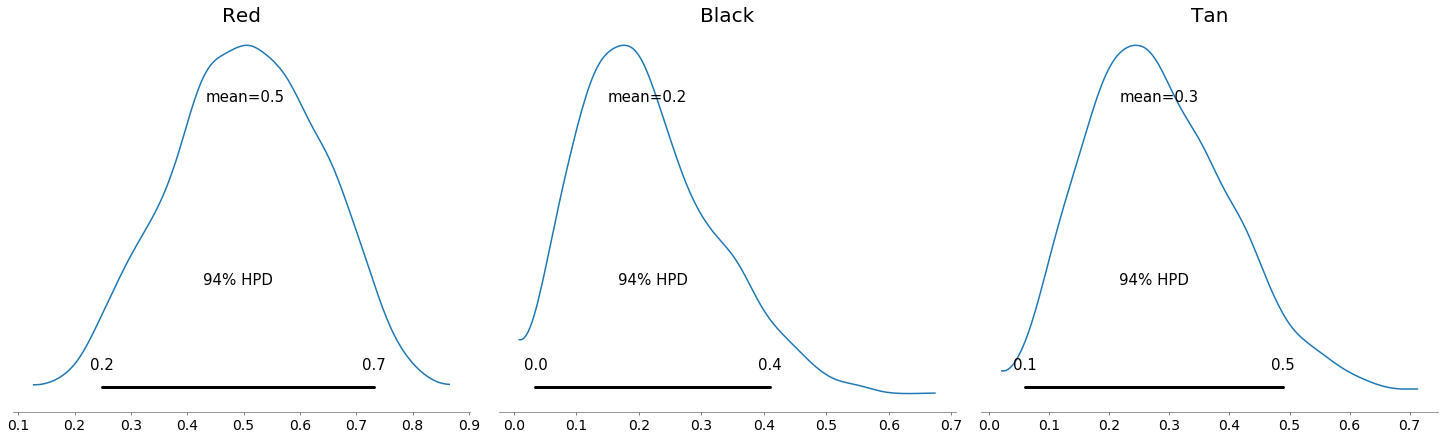

In [10]:
dataPlot2 = pm.plots.plot_posterior(trace, figsize=(20,6))
dataPlot2[0].set_title('Red', fontsize=20)
dataPlot2[1].set_title('Black', fontsize=20)
dataPlot2[2].set_title('Tan', fontsize=20)